1 Problem Statement
This project understands how gender race ,score and other factors affect the test score/performance of a student

2 Import data and required Packages

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import data as Pandas dataframe


In [6]:
df = pd.read_csv('data/stud.csv')

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [8]:
df.shape


(1000, 8)

Dataset Information 
gender -> Male/Female
race_ethnicity -> Group ABCDE
parental_level_of_education -> parents final education(bachelor's degree,some college,masters college,associate degree,highschool) 
lunch -> 2 values standard and free/reduced
test_prepration course ->none or completed
math score
reading score
writing score



3 Data Checks to be done
    <li>Check Missing values
    <li>Check Duplicates
    <li>Check data type
    <li>Check the number of unique values of each column
    <li>Check Stats of the data
    <li>Check Various Categories in the Data wrt categorical columns

Check Missing Values

In [9]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

there no missing value in the dataset

Check duplicates

In [10]:
df.duplicated().sum()

np.int64(0)

Check datatype

In [11]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Check the number of unique values of each column

In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Check Stats of the data

In [14]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<li>We have 3 numerical columns
<li>mean for 3 cloums is in range of 65-70
<li>Standard Deviatio is around 14-15
<li>Math score min is 0 while reading score is 17 and writing score is 10

Exploreing Data

In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


We will try to get the uniques value of all coulmns 

In [16]:
df.columns.unique()

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [17]:
df['gender'].unique()
df['race_ethnicity'].unique()
df['parental_level_of_education'].unique()
df['race_ethnicity'].unique()
df['lunch'].unique()
df['test_preparation_course'].unique()


array(['none', 'completed'], dtype=object)

In [18]:
for col in df.columns:
    if df[col].dtypes == 'O':
        print(f"Categories in variable :  ",df[col].unique())

Categories in variable :   ['female' 'male']
Categories in variable :   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in variable :   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in variable :   ['standard' 'free/reduced']
Categories in variable :   ['none' 'completed']


Find out 
numerical and categorical features 

In [19]:
numerical_feature = [nf for nf in df.columns if df[nf].dtypes != 'O']
categorical_feature = [cf for cf in df.columns if df[cf].dtypes == 'O']



In [20]:
# print the coulumn
print('We have {} numerical Coulmne {}'.format(len(numerical_feature),numerical_feature))
print('We have {} categorical columns {}'.format(len(categorical_feature),categorical_feature))

We have 3 numerical Coulmne ['math_score', 'reading_score', 'writing_score']
We have 5 categorical columns ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [21]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


math_score  reading_score  writing_score can be added
<li> To create Total_score
<li> and Average_score

In [22]:
df['Total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['Average_score'] = df['Total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Visualization

Histogram and kde plot 

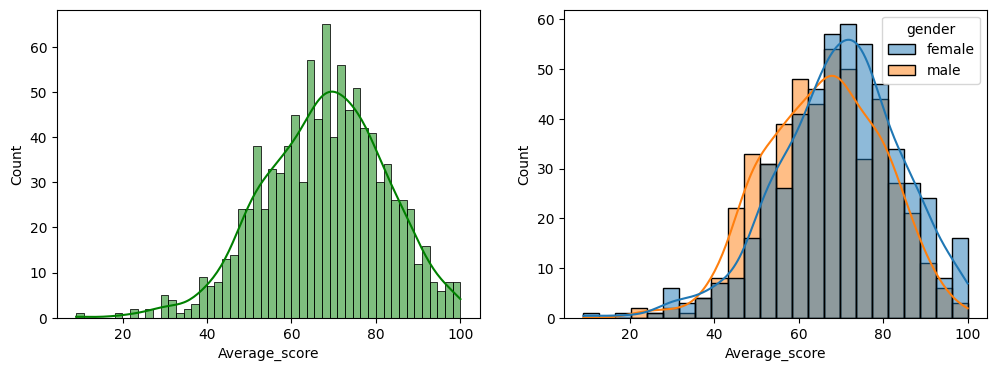

In [23]:
fig,axs=plt.subplots(1,2,figsize=(12,4))
plt.subplot(121)
sns.histplot(data=df,x='Average_score',bins=50,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average_score',kde=True,hue='gender')
#sns.histplot(data=df,x='Average_score',kde=True,hue='lunch')
#sns.histplot(data=df,x='Average_score',kde=True,hue='test_preparation_course')

plt.show()

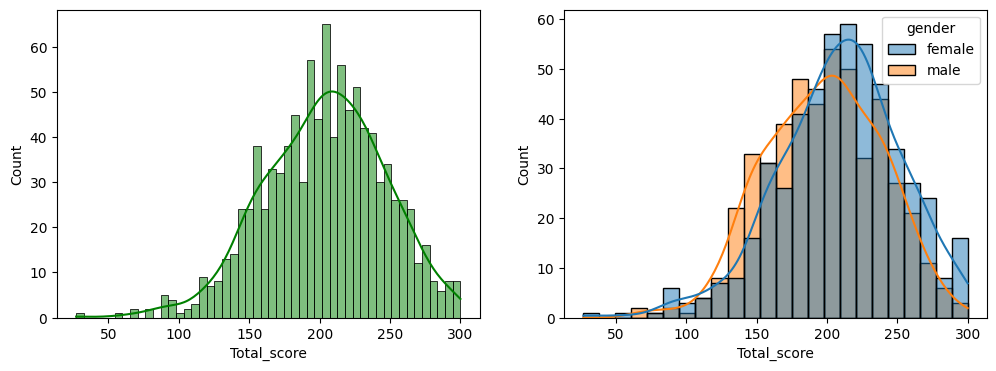

In [24]:
fig,axs=plt.subplots(1,2,figsize=(12,4))
plt.subplot(121)
sns.histplot(data=df,x='Total_score',bins=50,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_score',kde=True,hue='gender')
#sns.histplot(data=df,x='Average_score',kde=True,hue='lunch')
#sns.histplot(data=df,x='Average_score',kde=True,hue='test_preparation_course')

plt.show()

Insight 
<li> Female student tend to perform better 

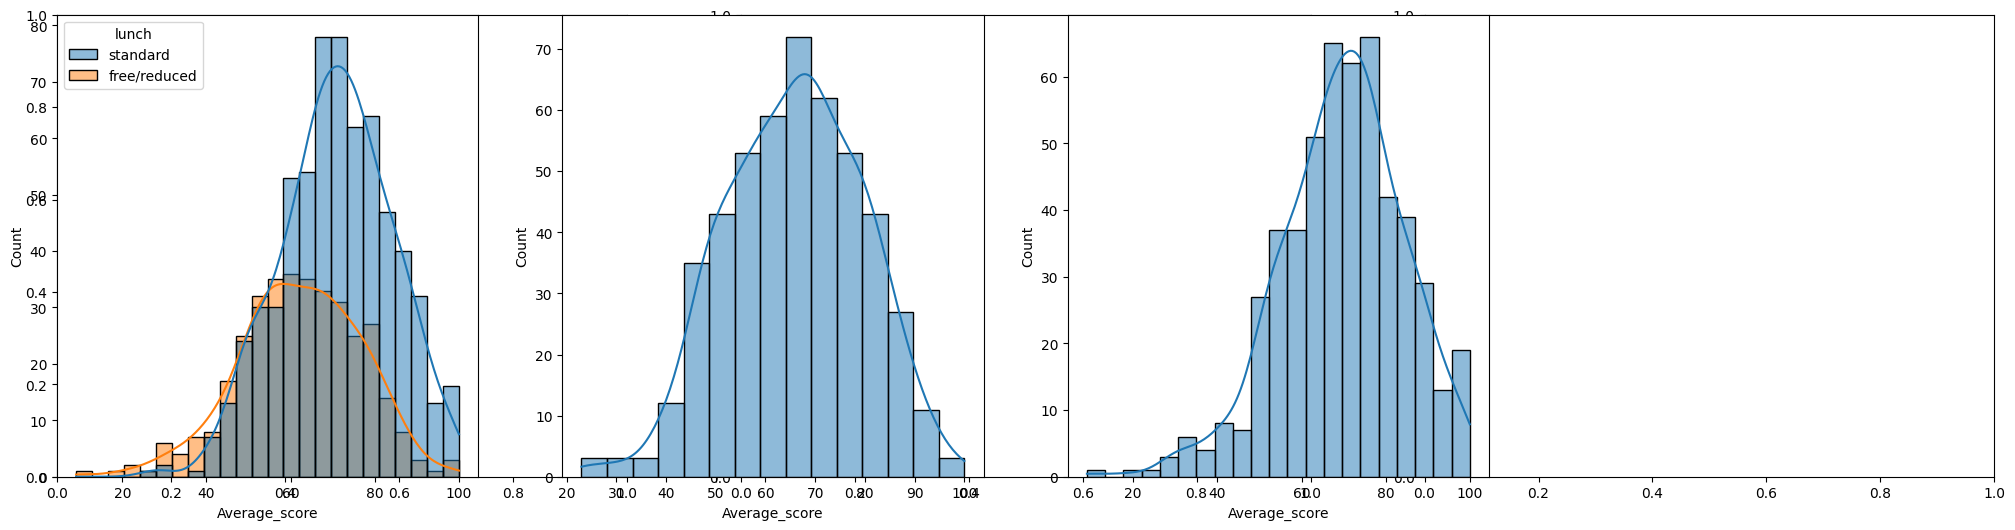

In [25]:
fig,axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True)
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True)
plt.show()

Standard lunch helps in good score in exam


In [26]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


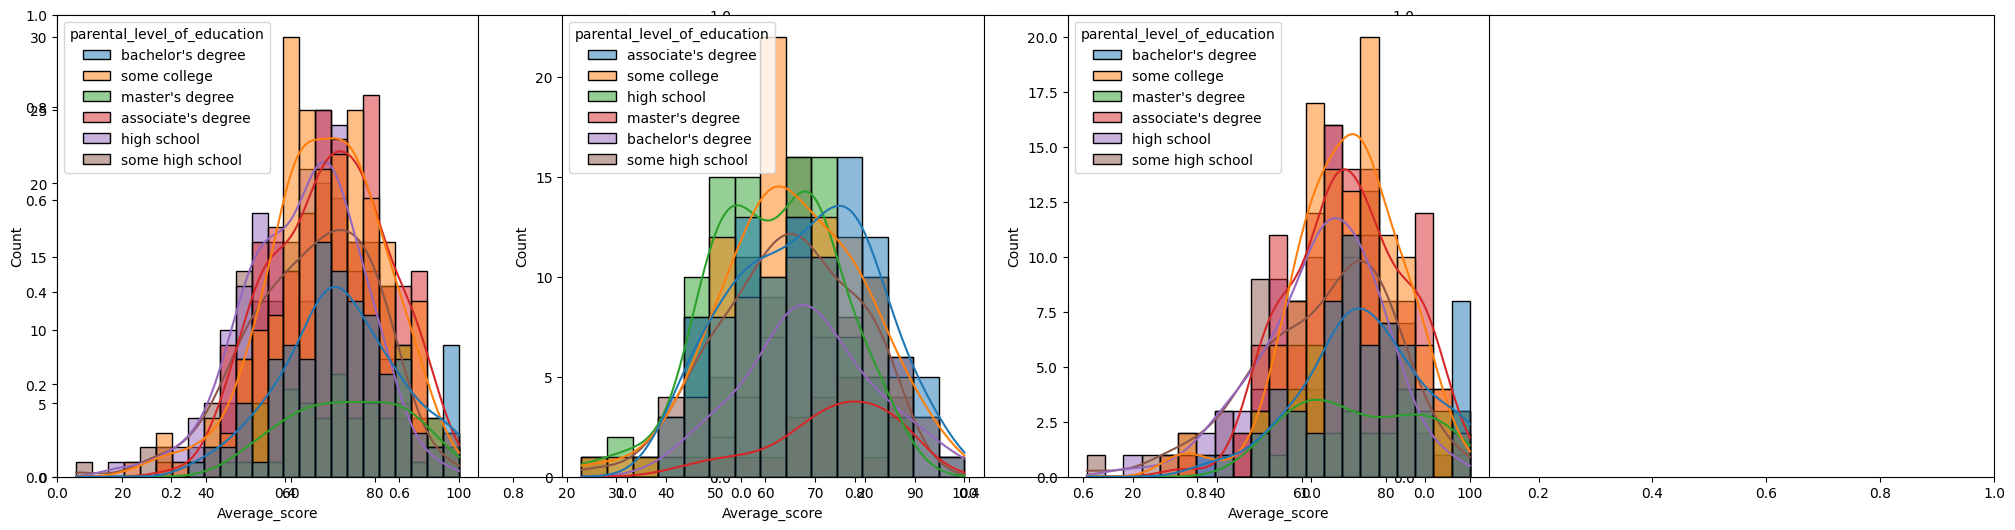

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='parental_level_of_education')
plt.show()

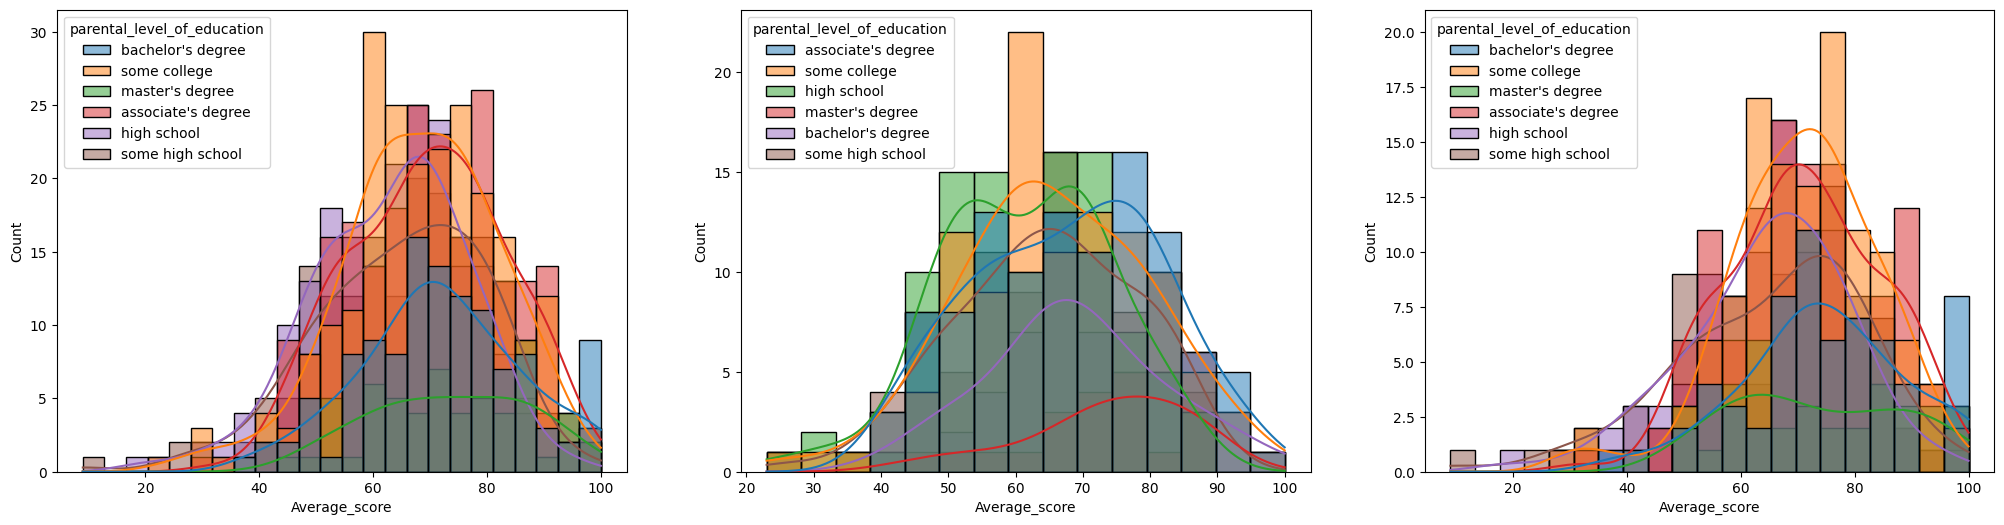

In [28]:
plt.figure(figsize=(25, 6))

plt.subplot(131)  # Correct numbering for 3 subplots
sns.histplot(data=df, x='Average_score', kde=True, hue='parental_level_of_education')

plt.subplot(132)  # Second subplot
sns.histplot(data=df[df.gender=='male'], x='Average_score', kde=True, hue='parental_level_of_education')

plt.subplot(133)  # Third subplot
sns.histplot(data=df[df.gender=='female'], x='Average_score', kde=True, hue='parental_level_of_education')

plt.show()

insight
<li>in general parents education does not affect how the students  performance

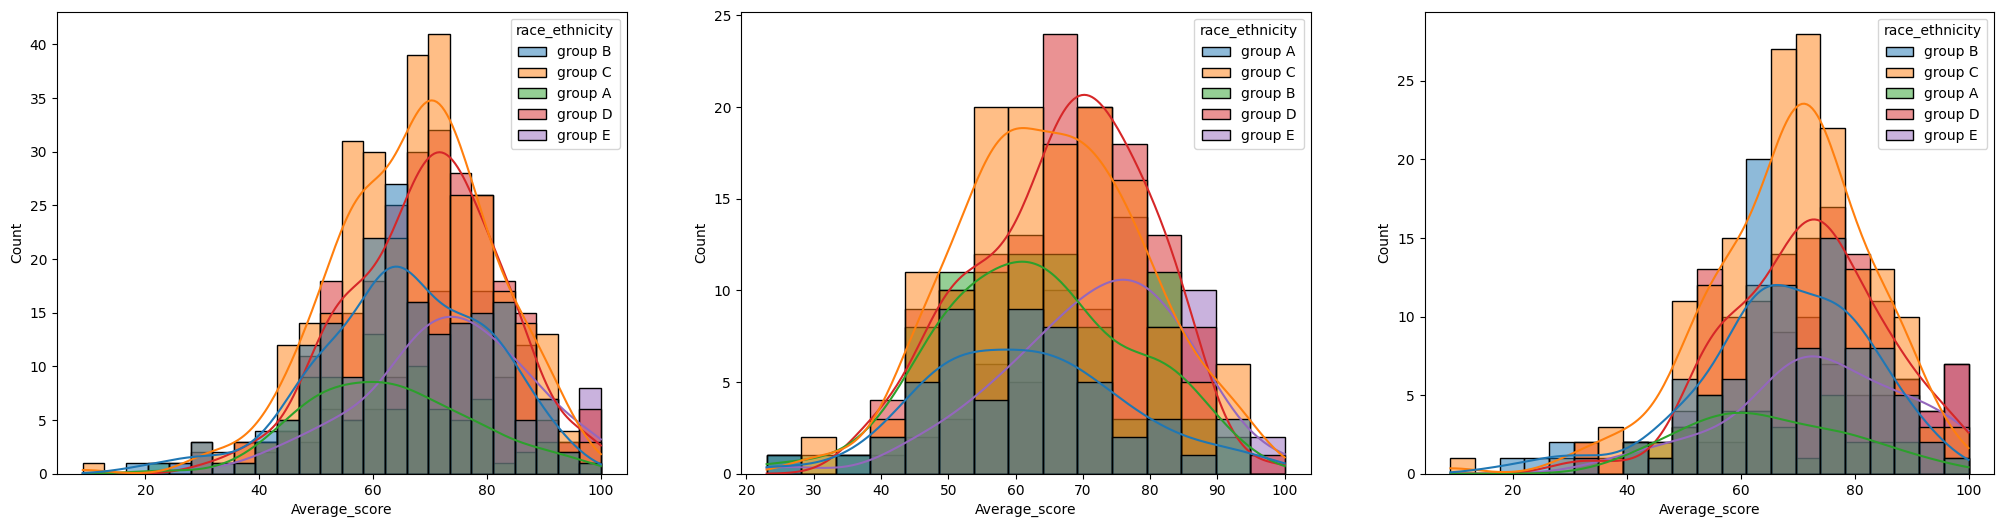

In [29]:
plt.figure(figsize=(25, 6))

plt.subplot(131)  # Correct numbering for 3 subplots
sns.histplot(data=df, x='Average_score', kde=True, hue='race_ethnicity')

plt.subplot(132)  # Second subplot
sns.histplot(data=df[df.gender=='male'], x='Average_score', kde=True, hue='race_ethnicity')

plt.subplot(133)  # Third subplot
sns.histplot(data=df[df.gender=='female'], x='Average_score', kde=True, hue='race_ethnicity')

plt.show()

<li>Group A and B not perform well for male and female

In [30]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


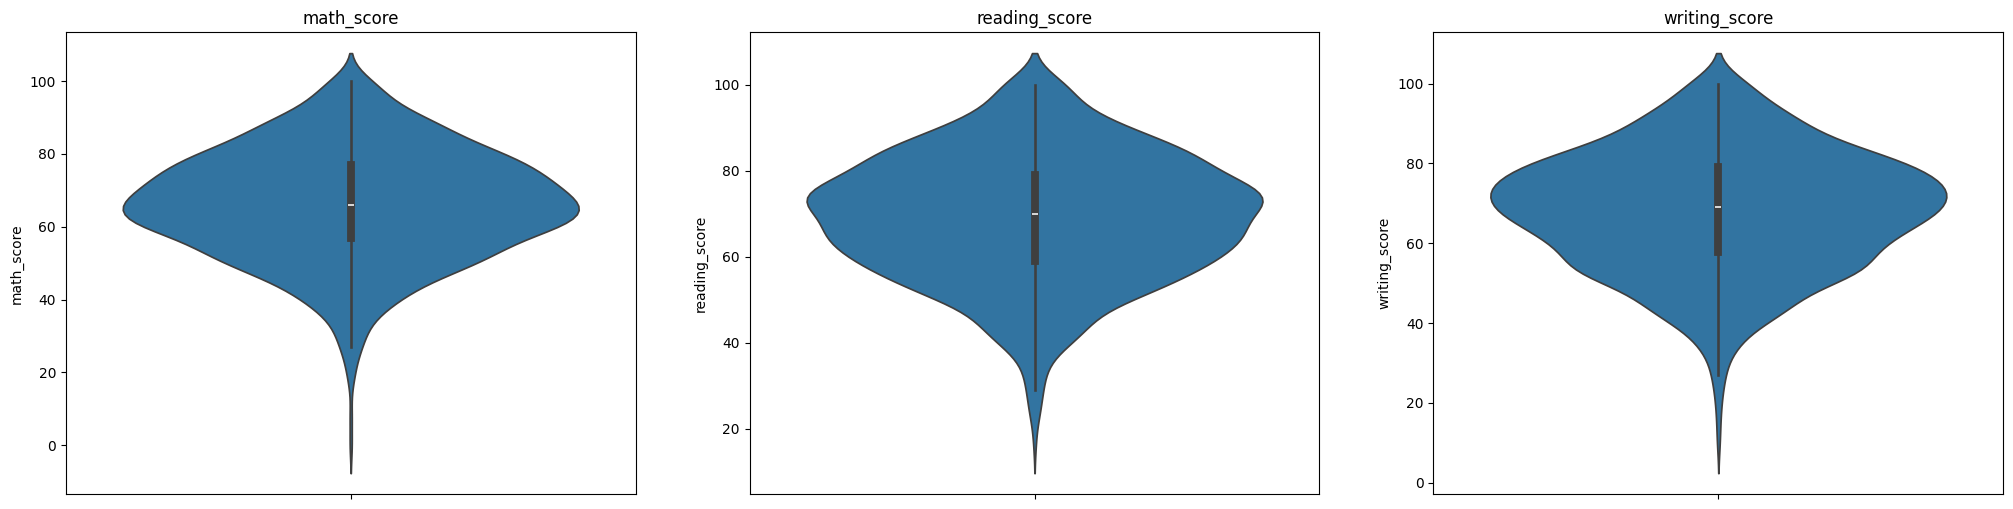

In [31]:
plt.figure(figsize=(25, 6))

plt.subplot(131)  # Correct numbering for 3 subplots
plt.title('math_score')
sns.violinplot(y='math_score',data=df)

plt.subplot(132)  # Second subplot
plt.title('reading_score')
sns.violinplot(data=df,y='reading_score')

plt.subplot(133)  # Third subplot
plt.title('writing_score')
sns.violinplot(data=df,y='writing_score')

plt.show()

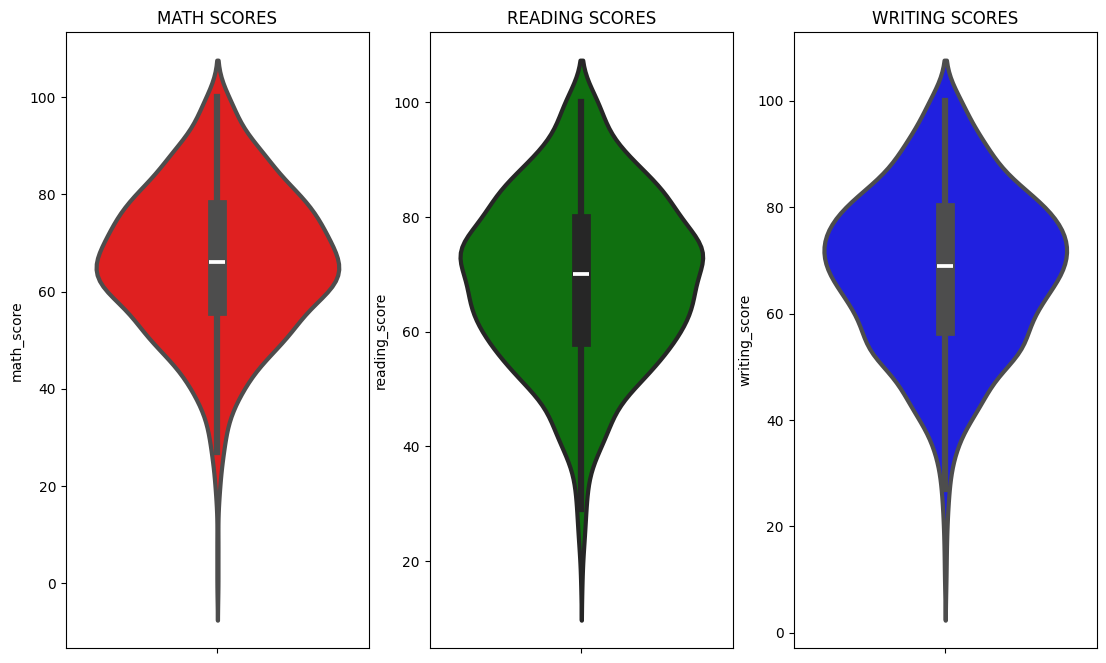

In [32]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

4.2 Maximumum score of students in all three subjects


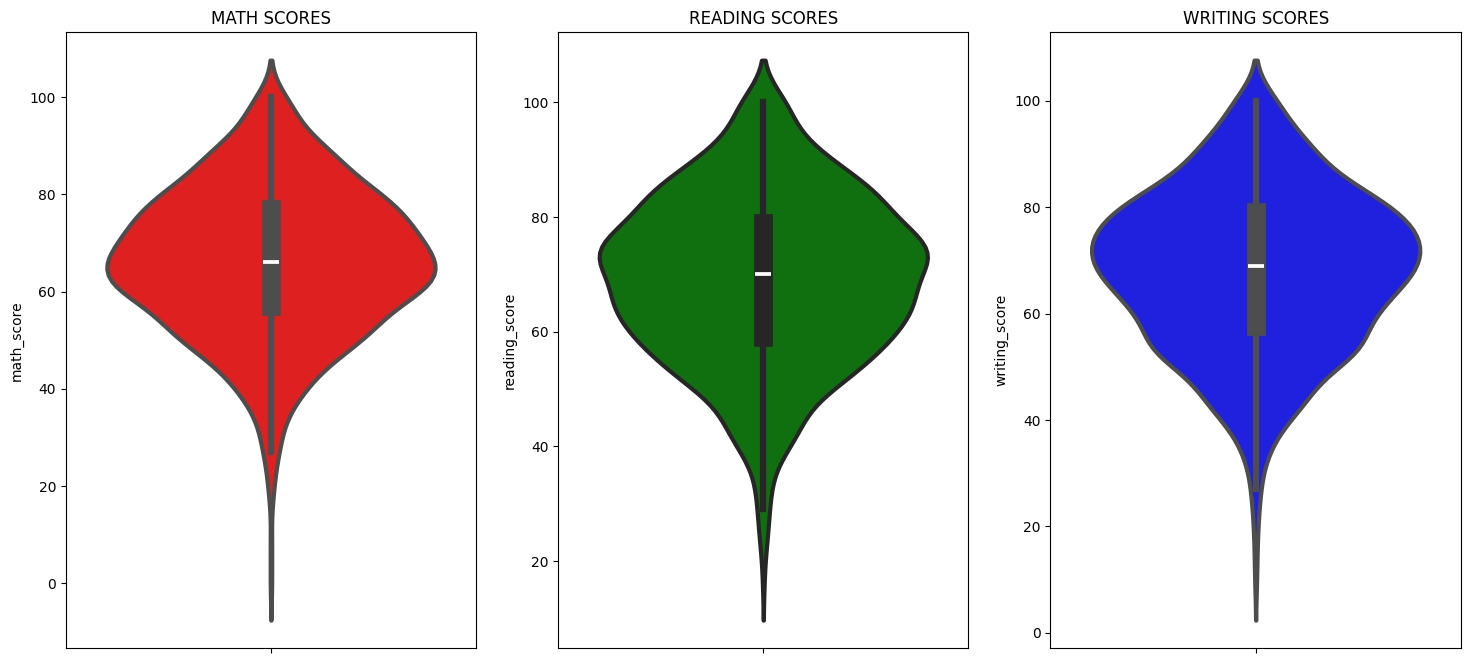

In [33]:
plt.figure(figsize=(18,8))

plt.subplot(1, 3, 1)  # Corrected to 3 columns
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)

plt.subplot(1, 3, 2)  # Corrected to 3 columns
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)

plt.subplot(1, 3, 3)  # Corrected to 3 columns
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)

plt.show()


<li>student score b/w 60-80 marks

4.3 Multivariate analysis using pieplot


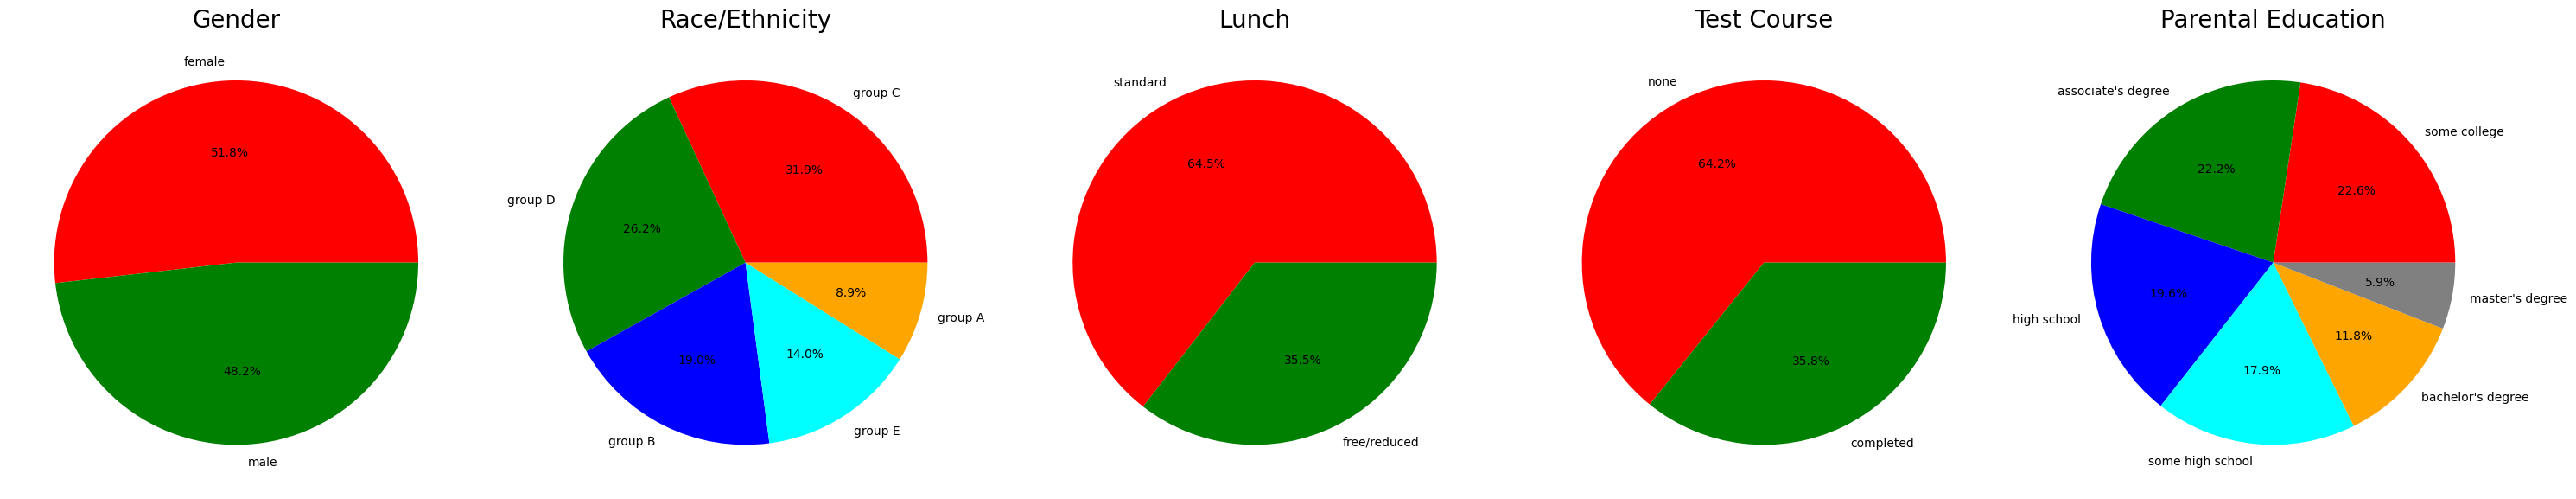

In [34]:
plt.rcParams['figure.figsize'] = (30, 12)

# Gender Pie Chart
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = size.index  # Ensure labels match actual order
plt.pie(size, labels=labels, autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Gender', fontsize=20)
plt.axis('off')

# Race/Ethnicity Pie Chart
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = size.index
plt.pie(size, labels=labels, autopct='%1.1f%%', colors=['red', 'green', 'blue', 'cyan', 'orange'])
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

# Lunch Type Pie Chart
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = size.index
plt.pie(size, labels=labels, autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Test Preparation Course Pie Chart
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = size.index
plt.pie(size, labels=labels, autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Test Course', fontsize=20)
plt.axis('off')

# Parental Education Pie Chart
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = size.index
plt.pie(size, labels=labels, autopct='%1.1f%%', colors=['red', 'green', 'blue', 'cyan', 'orange', 'grey'])
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()


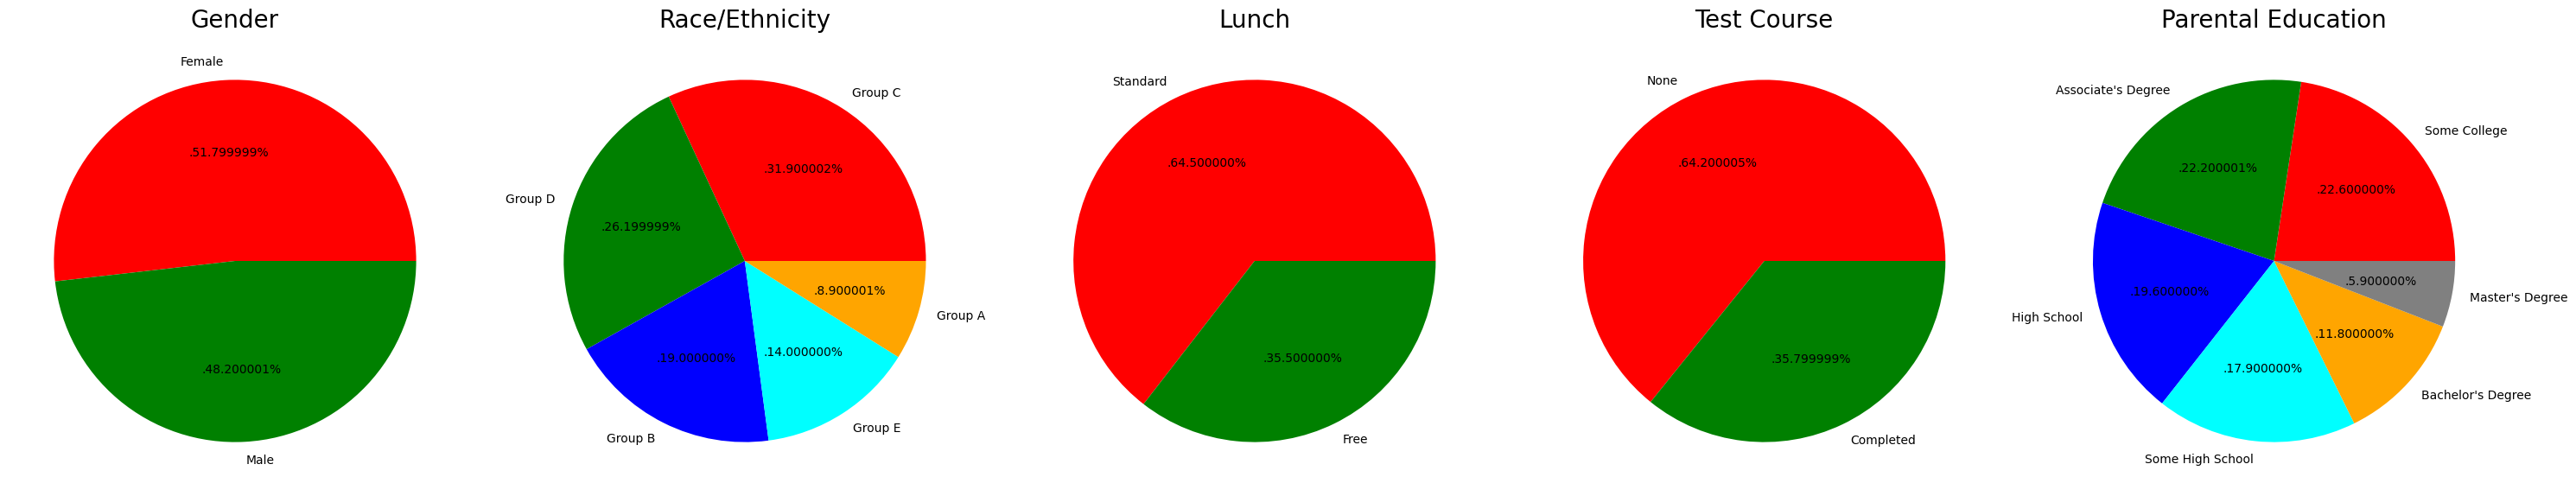

In [35]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights
<li>Number of Male and Female students is almost equal
<li>Number students are greatest in Group C
<li>Number of students who have standard lunch are greater
<li>Number of students who have not enrolled in any test preparation course is greater
<li>Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

4.4 Feature Wise analysis
<li>Gender

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )


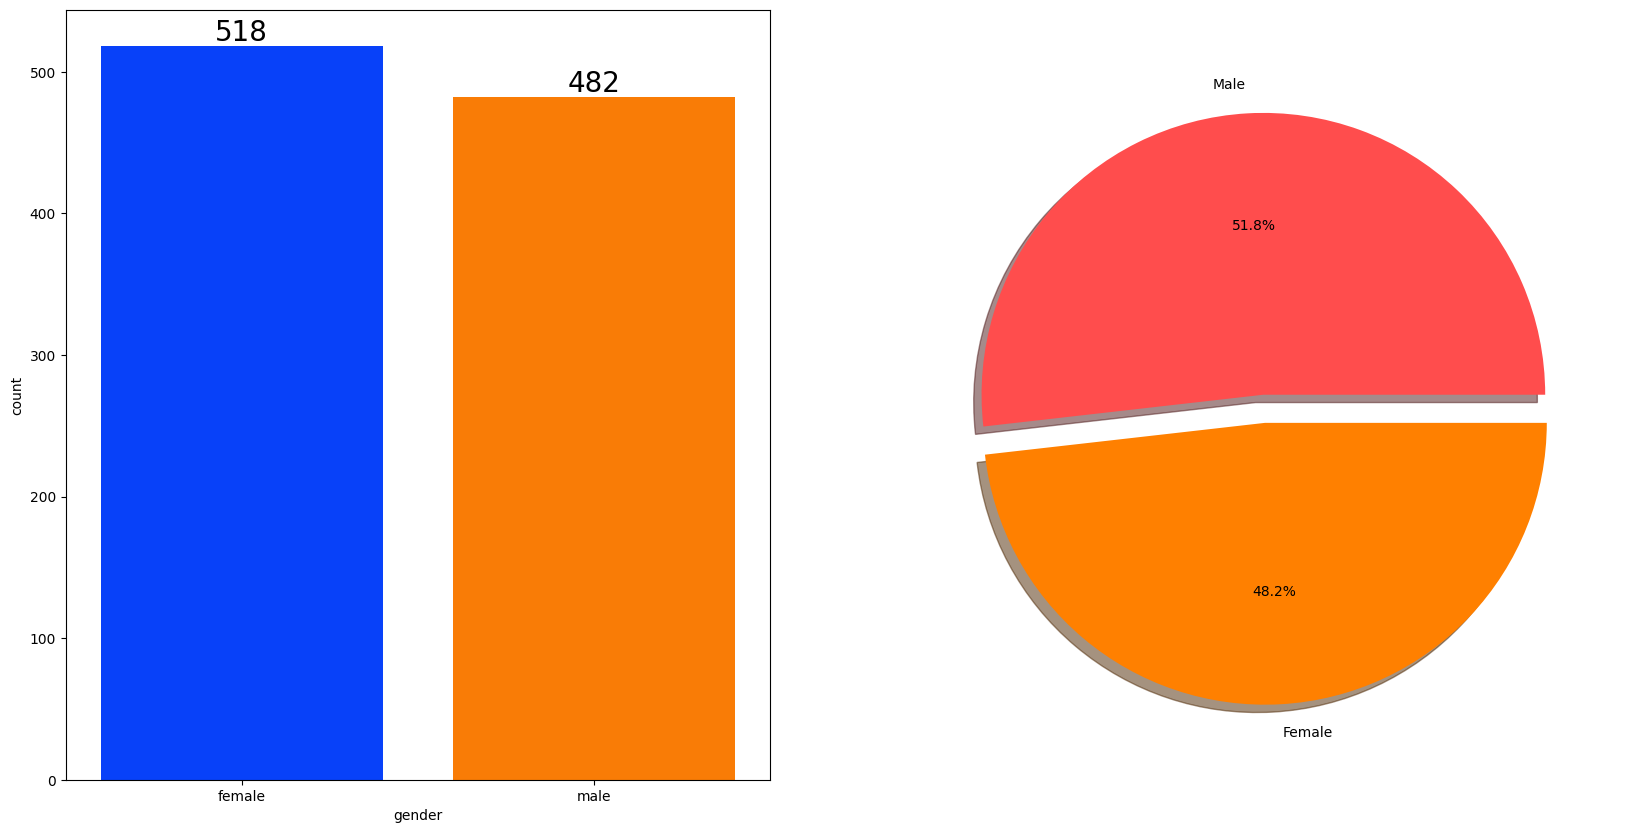

In [36]:
fig,ax = plt.subplots(1,2,figsize=(20,10))

sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


Gender has balanced distribution with Male and female 

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )


In [41]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [45]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,Total_score,Average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


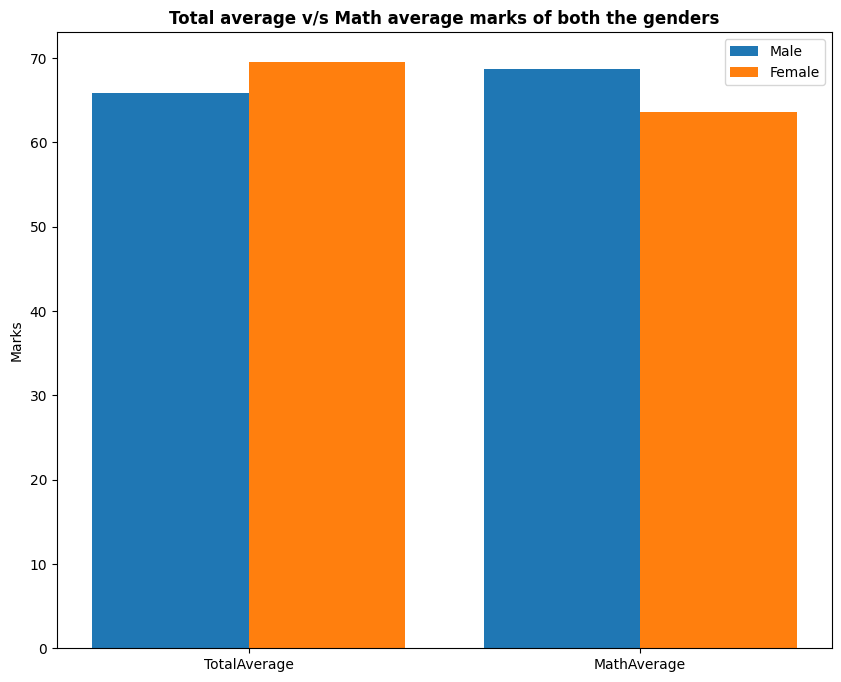

In [48]:
plt.figure(figsize=(10,8))

X = ['TotalAverage','MathAverage']

female_scores=[gender_group['Average_score'][0],gender_group['math_score'][0]]
male_scores=[gender_group['Average_score'][1],gender_group['math_score'][1]]

X_axis= np.arange(len(X))

plt.bar(X_axis - 0.2,male_scores,0.4,label='Male')
plt.bar(X_axis + 0.2,female_scores,0.4,label='Female')
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

on average female have better score then male where as the math score of Male is better then female

4.4.2 RACE/EHNICITY COLUMN


UNIVARIATE ANALYSIS ( How is Group wise distribution ?)


AttributeError: Rectangle.set() got an unexpected keyword argument 'axs'

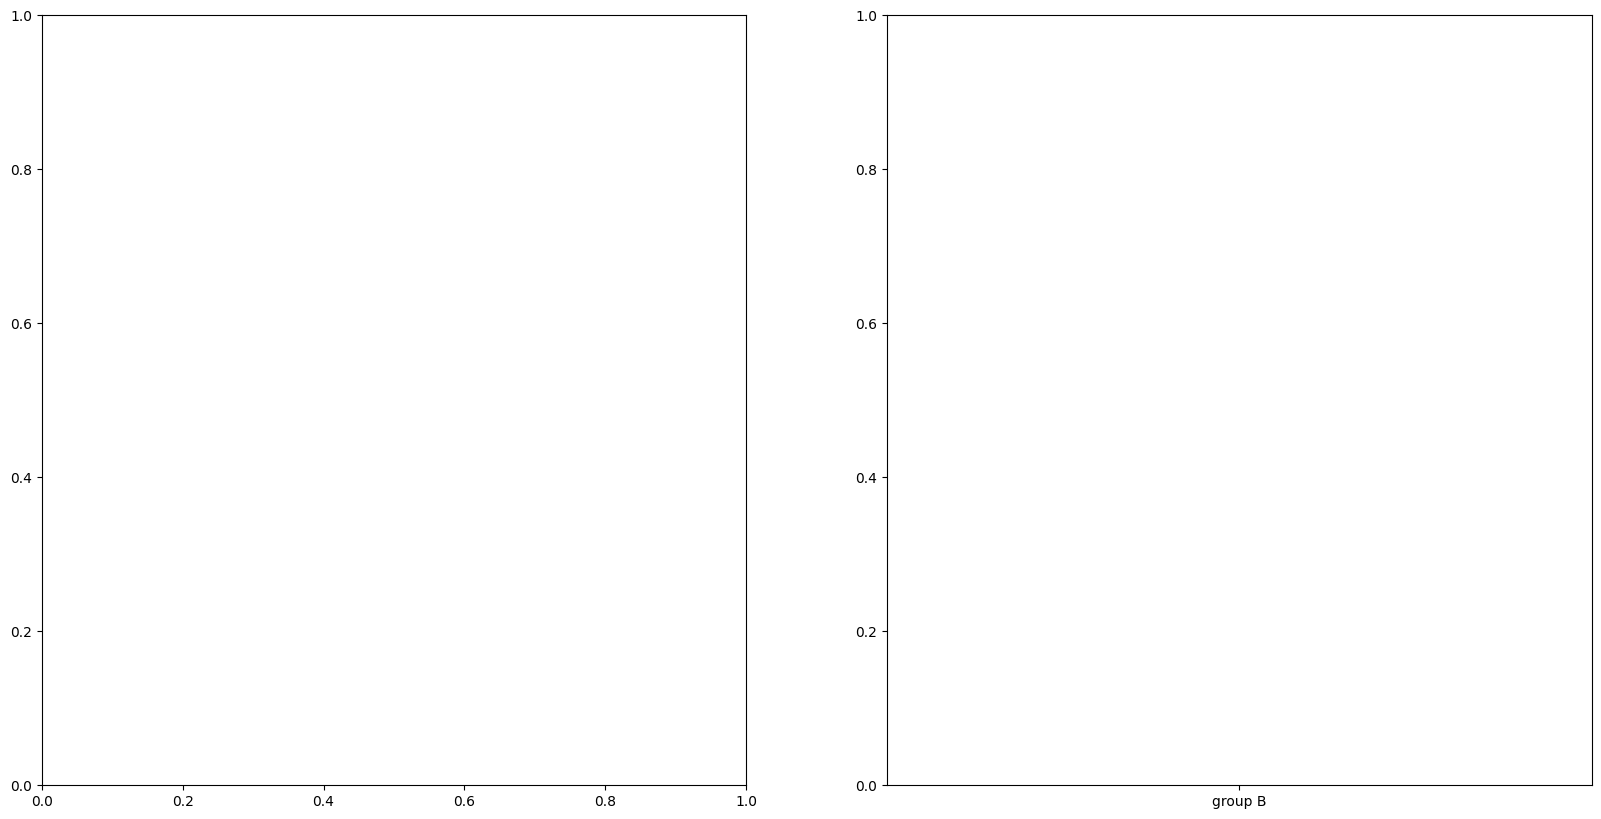

In [50]:
fig,axs = plt.subplots(1,2,figsize=(20,10))

sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',axs=axs[0],saturation=0.95)
for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

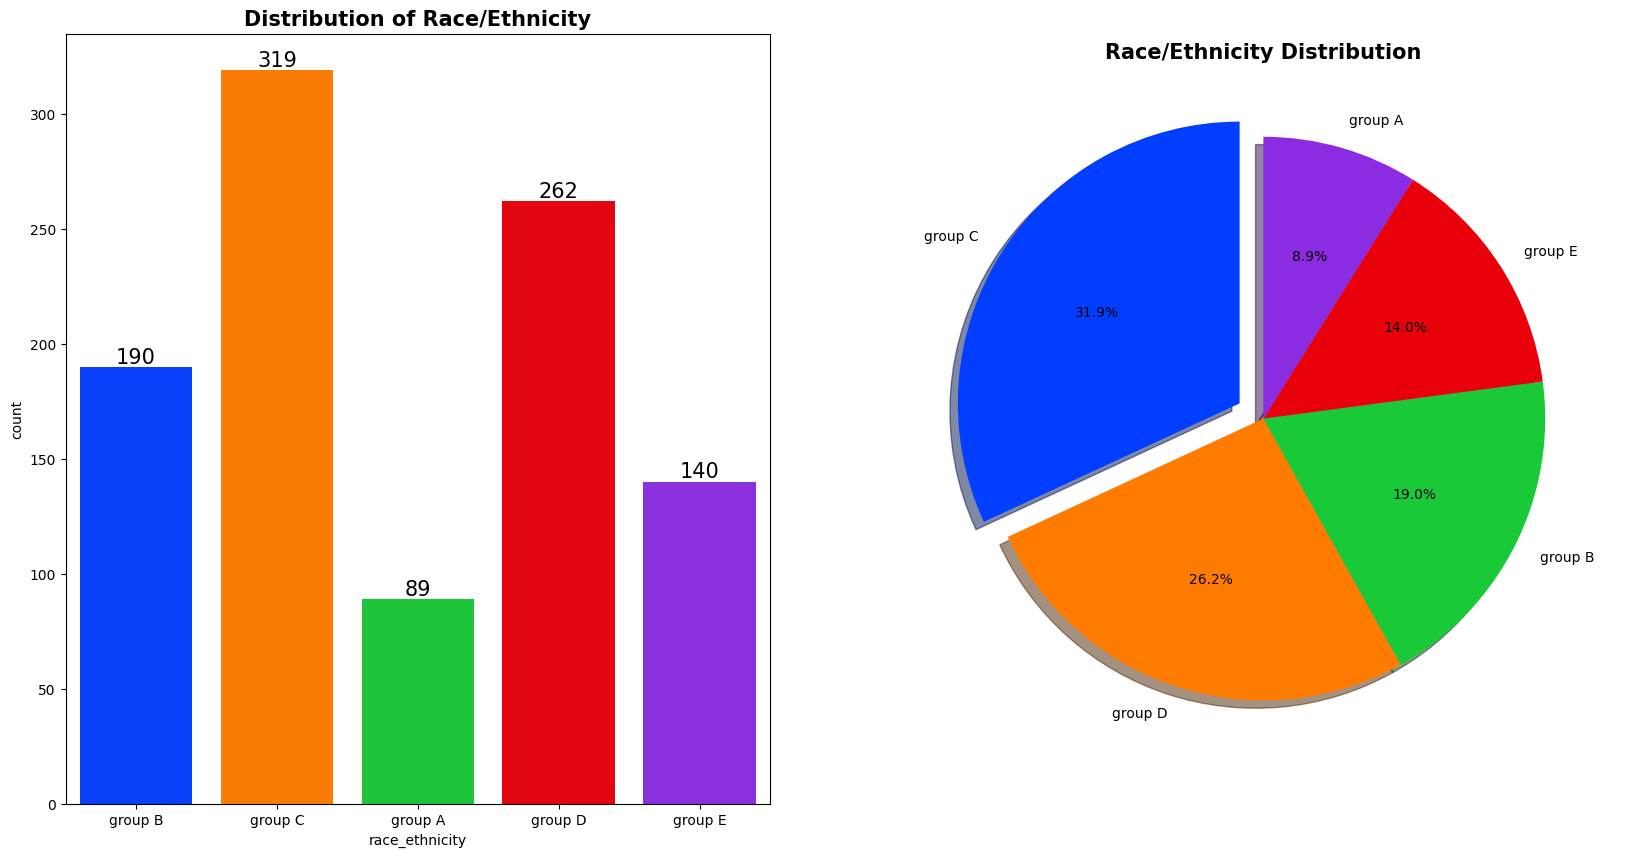

In [51]:


# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# 📊 Bar Plot for Race/Ethnicity Distribution
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
ax[0].set_title("Distribution of Race/Ethnicity", fontsize=15, fontweight='bold')

# Adding labels to bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# 🥧 Pie Chart for Race/Ethnicity Distribution
ax[1].pie(
    x=df['race_ethnicity'].value_counts(),
    labels=df['race_ethnicity'].value_counts().index,
    explode=[0.1, 0, 0, 0, 0], 
    autopct='%1.1f%%', 
    shadow=True,
    colors=sns.color_palette('bright'),
    startangle=90
)
ax[1].set_title("Race/Ethnicity Distribution", fontsize=15, fontweight='bold')

# Show the plots
plt.show()


BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )


AttributeError: 'Axes' object has no attribute 'setTitle'

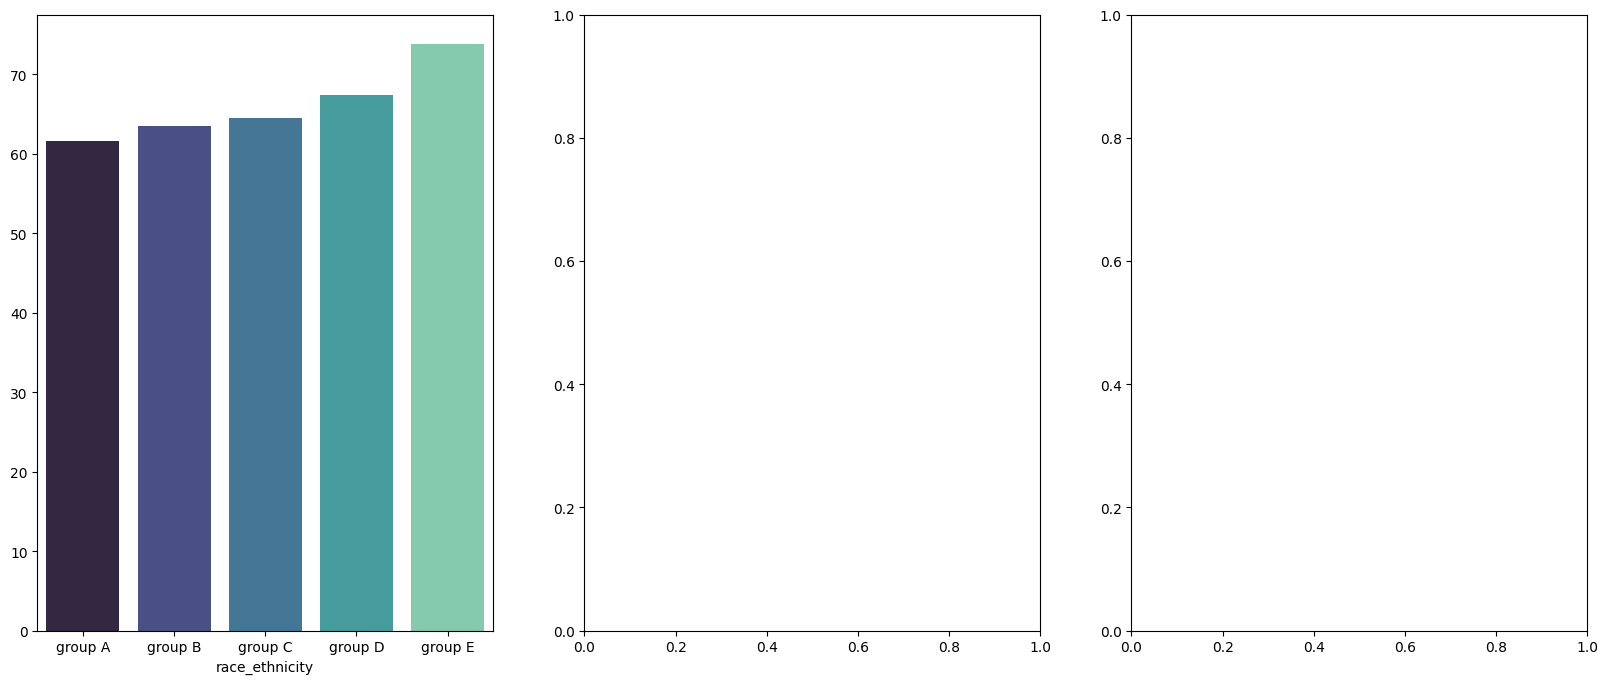

In [55]:
groupby_race_ethnicity=df.groupby('race_ethnicity')
#groupby_race_ethnicity[
fig,axs = plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=groupby_race_ethnicity['math_score'].mean().index,y=groupby_race_ethnicity['math_score'].mean().values,palette='mako',ax=axs[0])
axs[0].setTitle('MathScore',color='#005ce6',size=20)
for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=15)

In [56]:

# 📊 Group data by 'race/ethnicity' and compute mean
Group_data2 = df.groupby('race_ethnicity').mean()

# 🔹 Create subplots
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# 📏 Math Score Bar Plot
sns.barplot(
    x=Group_data2.index,
    y=Group_data2['math score'],
    palette='mako',
    ax=ax[0]
)
ax[0].set_title('Math Score', color='#005ce6', size=20)
ax[0].set_xlabel("Race_Ethnicity", fontsize=14)
ax[0].set_ylabel("Average Score", fontsize=14)
ax[0].tick_params(axis='x', rotation=20)

# Add bar labels
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Show the plots
plt.tight_layout()
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

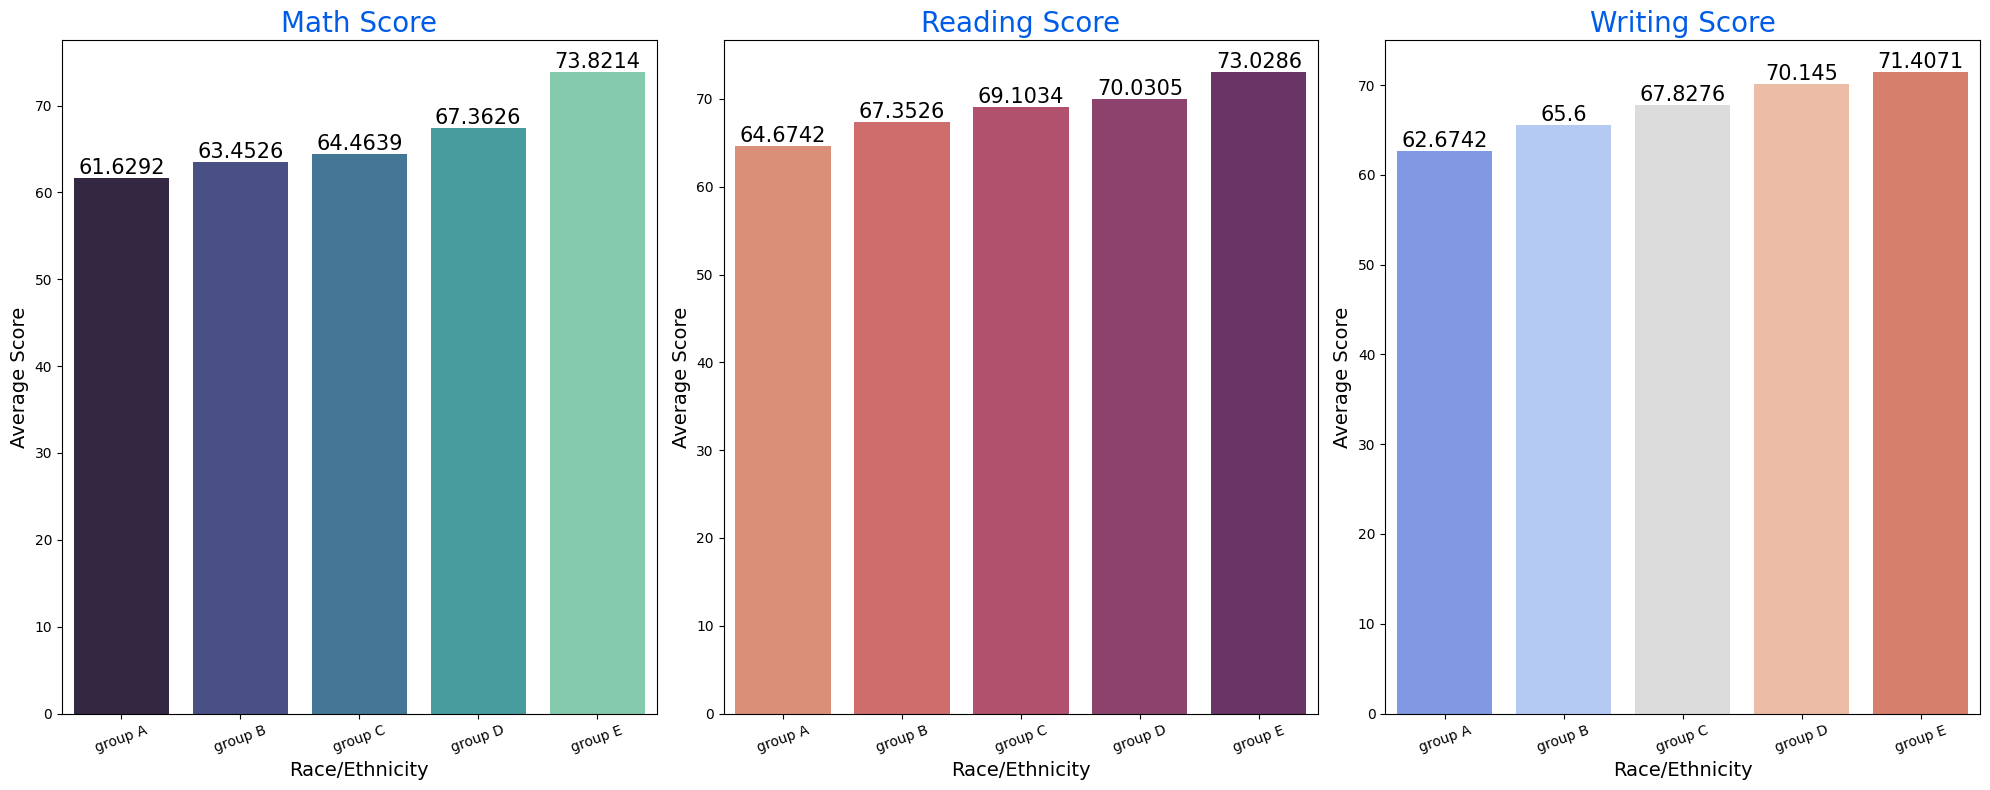

In [63]:


# Ensure numeric columns are selected before applying mean()
numeric_df = df.select_dtypes(include=['number'])

# Compute mean scores by 'race/ethnicity'
Group_data2 = df.groupby('race_ethnicity')[numeric_df.columns].mean()

# Create subplots
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Math Score Bar Plot
sns.barplot(
    x=Group_data2.index,
    y=Group_data2['math_score'],
    palette='mako',
    ax=ax[0]
)
ax[0].set_title('Math Score', color='#005ce6', size=20)
ax[0].set_xlabel("Race/Ethnicity", fontsize=14)
ax[0].set_ylabel("Average Score", fontsize=14)
ax[0].tick_params(axis='x', rotation=20)

# Add labels to bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Reading Score Bar Plot
sns.barplot(
    x=Group_data2.index,
    y=Group_data2['reading_score'],
    palette='flare',
    ax=ax[1]
)
ax[1].set_title('Reading Score', color='#005ce6', size=20)
ax[1].set_xlabel("Race/Ethnicity", fontsize=14)
ax[1].set_ylabel("Average Score", fontsize=14)
ax[1].tick_params(axis='x', rotation=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Writing Score Bar Plot
sns.barplot(
    x=Group_data2.index,
    y=Group_data2['writing_score'],
    palette='coolwarm',
    ax=ax[2]
)
ax[2].set_title('Writing Score', color='#005ce6', size=20)
ax[2].set_xlabel("Race/Ethnicity", fontsize=14)
ax[2].set_ylabel("Average Score", fontsize=14)
ax[2].tick_params(axis='x', rotation=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()


Insights
Group E students have scored the highest marks.
Group A students have scored the lowest marks.
Students from a lower Socioeconomic status have a lower avg in all course subjects

4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
What is educational background of student's parent ?
Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )


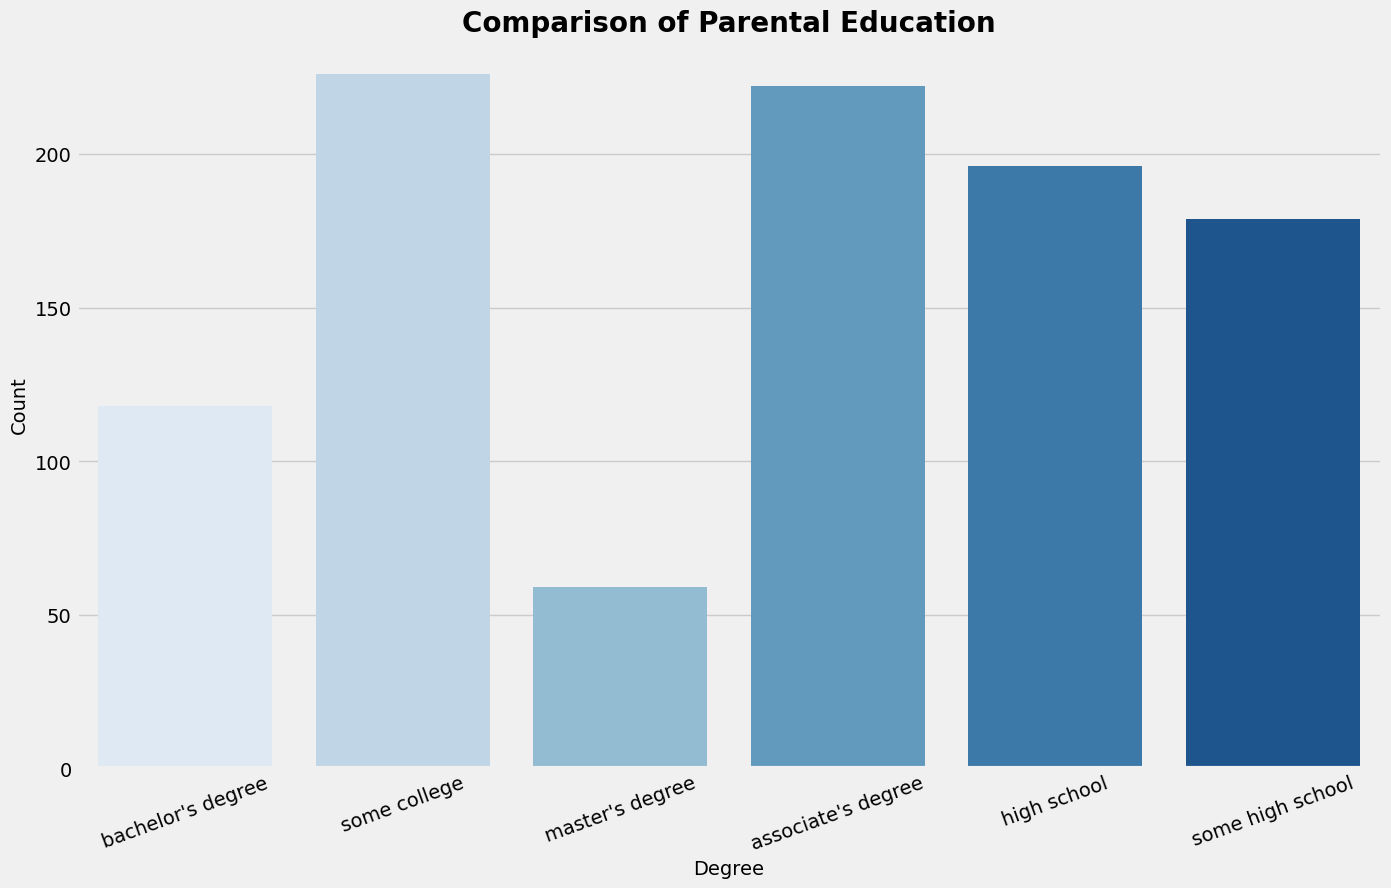

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Corrected countplot
sns.countplot(x=df['parental_level_of_education'], palette='Blues')

# Improve labels and title
plt.title('Comparison of Parental Education', fontweight='bold', fontsize=20)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=20)

# Show plot
plt.show()


In [66]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

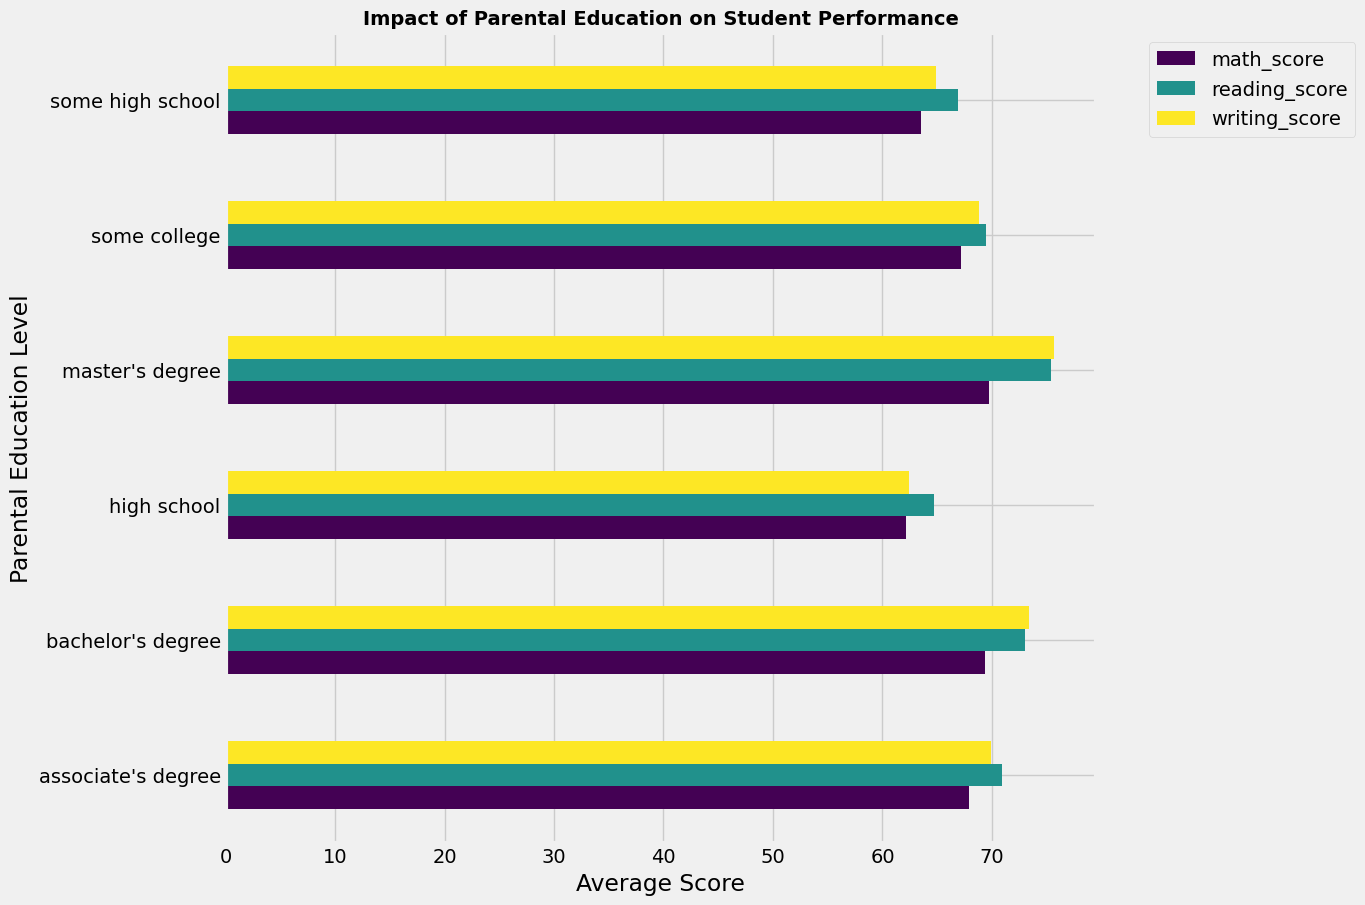

In [68]:
df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean().plot(
    kind='barh', figsize=(10,10), colormap='viridis'
)

plt.xlabel("Average Score")
plt.ylabel("Parental Education Level")
plt.title("Impact of Parental Education on Student Performance", fontsize=14, fontweight='bold')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Insights
The score of student whose parents possess master and bachelor level education are higher than others.

4.4.6 CHECKING OUTLIERS


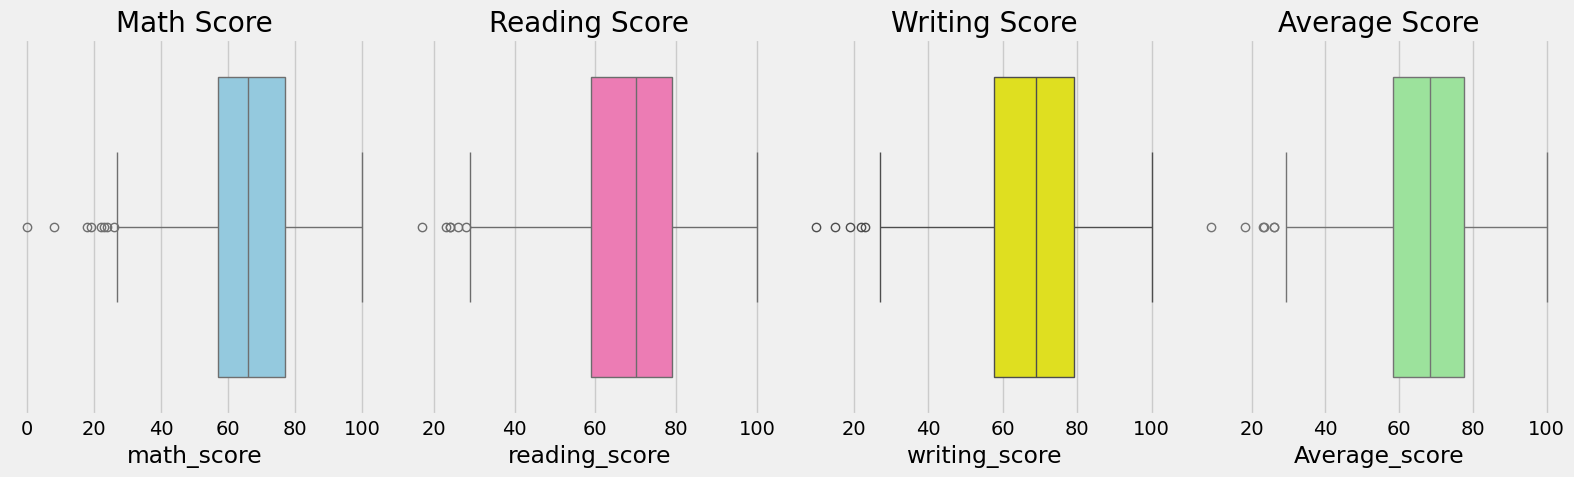

In [70]:
plt.figure(figsize=(16, 5))

plt.subplot(141)
sns.boxplot(x=df['math_score'], color='skyblue')
plt.title("Math Score")

plt.subplot(142)
sns.boxplot(x=df['reading_score'], color='hotpink')
plt.title("Reading Score")

plt.subplot(143)
sns.boxplot(x=df['writing_score'], color='yellow')
plt.title("Writing Score")

plt.subplot(144)
sns.boxplot(x=df['Average_score'], color='lightgreen')
plt.title("Average Score")

plt.tight_layout()  # Adjusts subplot layout to prevent overlap
plt.show()


4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT


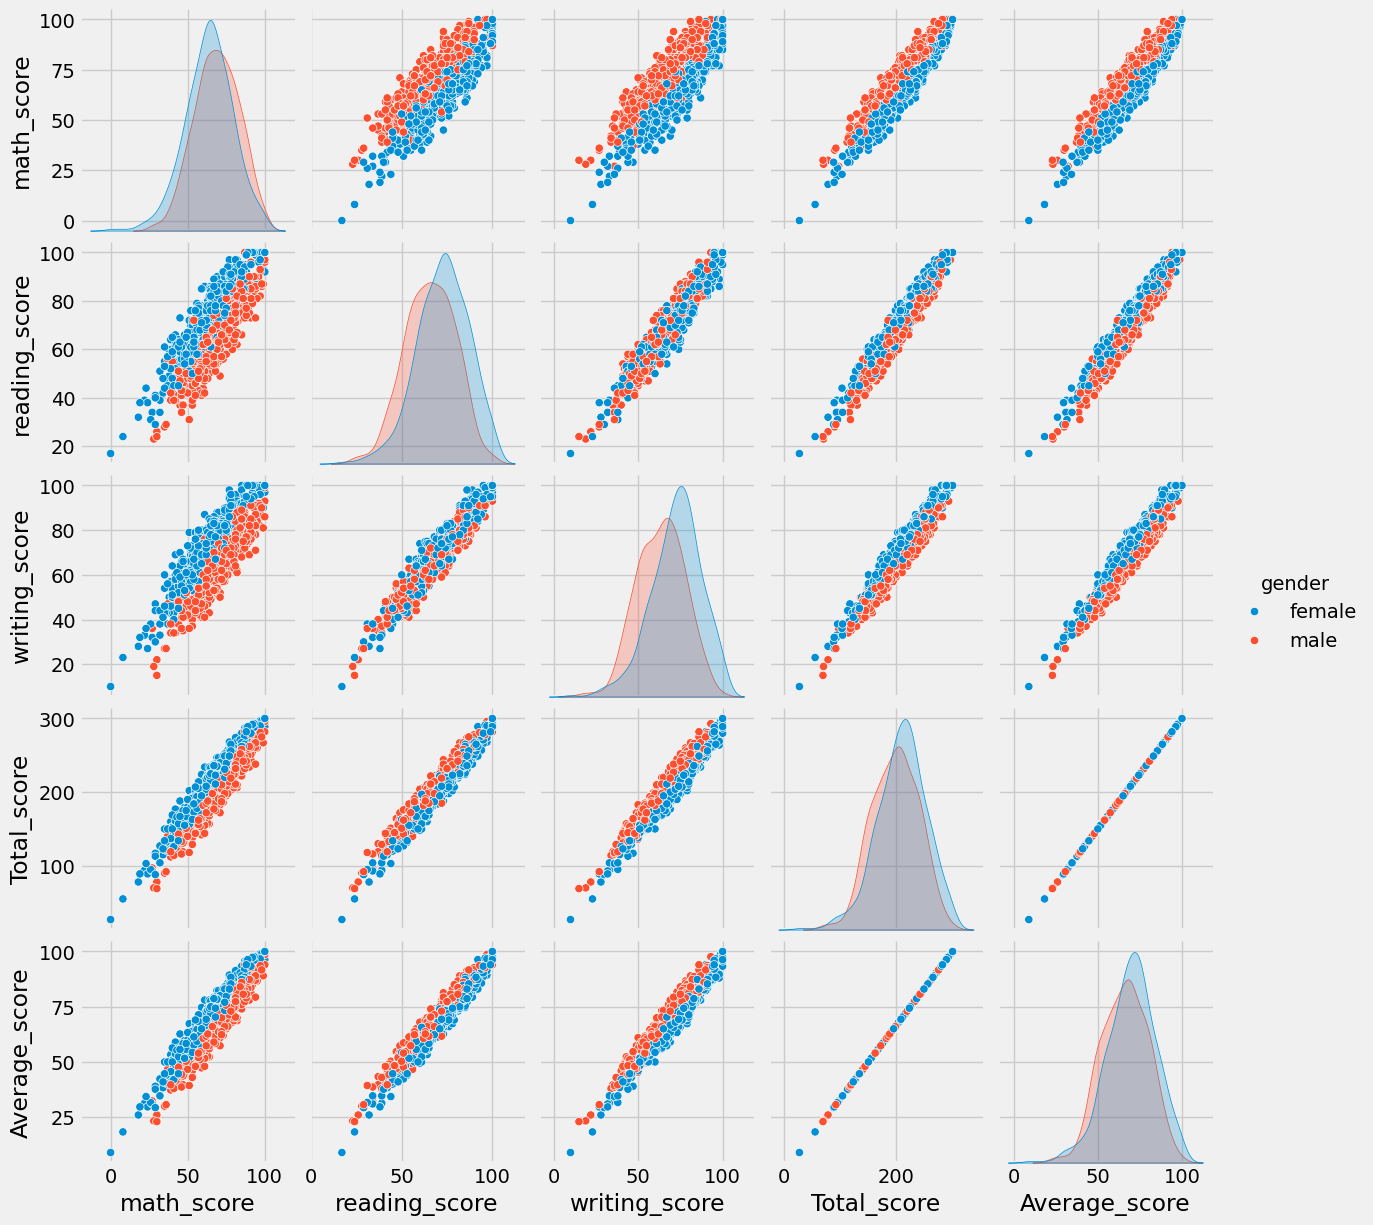

In [71]:
sns.pairplot(df,hue = 'gender')
plt.show()

. Conclusions
<li>Student's Performance is related with lunch, race, parental level education
<li>Females lead in pass percentage and also are top-scorers<li>
<li>Student's Performance is not much related with test preparation course
<li>Finishing preparation course is benefitial.
